# Index

- [1 Introduction](#1)
- [2 Title](#2)
- [3 Title](#3)
- [4 Title](#4)
- [5 Title](#5)
- [6 Title](#6)
- [7 Title](#7)
- [8 Title](#8)
- [9 Title](#9)
- [10 Title](#10)
- [11 Title](#11)
- [12 Title](#12)
- [13 Title](#13)
- [14 Title](#14)
- [15 Next Steps](#15)
- [16 Conclusions](#21)

# 1

## Introduction

instructions



[Index](#Index)

# 2

## Title

In [659]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.neighbors as skneighbors
import sklearn.metrics as skmetrics
from prettytable import PrettyTable

In [660]:
col_names = ["symboling","normalized_losses","make","fuel_type","aspiration","num_doors","body_style",
             "drive_wheels","engine_location","wheel_base","length","width","height","curb_weight","engine_type",
             "num_cylinders","engine_size","fuel_system","bore","stroke","compression_ratio","horsepower",
             "peak_rpm","city_mpg","highway_mpg","price"]
cars = pd.read_csv("imports-85.data", names=col_names)
cars

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [661]:
cars["make"].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [662]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [663]:
cars=cars.replace('?',np.nan)
cars

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [664]:
cars[["normalized_losses","curb_weight","bore","stroke","horsepower","peak_rpm","price"]]=cars[["normalized_losses","curb_weight","bore","stroke","horsepower","peak_rpm","price"]].astype("float")

In [665]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    float64
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

Instrusctions


In [666]:
cars.drop(columns=["normalized_losses"],inplace=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel_type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num_doors          203 non-null    object 
 5   body_style         205 non-null    object 
 6   drive_wheels       205 non-null    object 
 7   engine_location    205 non-null    object 
 8   wheel_base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb_weight        205 non-null    float64
 13  engine_type        205 non-null    object 
 14  num_cylinders      205 non-null    object 
 15  engine_size        205 non-null    int64  
 16  fuel_system        205 non

In [667]:
cars[cars['price'].isnull()]

,symboling,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [668]:
cars[cars['bore'].isnull()]

,symboling,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [669]:
cars[cars['horsepower'].isnull()]

,symboling,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [670]:
cars.dropna(inplace=True)

In [671]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel_type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num_doors          193 non-null    object 
 5   body_style         193 non-null    object 
 6   drive_wheels       193 non-null    object 
 7   engine_location    193 non-null    object 
 8   wheel_base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb_weight        193 non-null    float64
 13  engine_type        193 non-null    object 
 14  num_cylinders      193 non-null    object 
 15  engine_size        193 non-null    int64  
 16  fuel_system        193 non

In [672]:
cars["make"].value_counts()

toyota           32
nissan           18
mitsubishi       13
honda            13
volkswagen       12
mazda            12
subaru           12
peugot           11
volvo            11
dodge             8
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
mercury           1
Name: make, dtype: int64

In [673]:
cars_analysis = cars.copy()
cars_analysis

,symboling,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


[Index](#Index)

# 3

## Title

In [674]:
no_price_column = [each_column for each_column in cars.columns if each_column!='price']

instructions


In [675]:
cars['symboling'] = cars['symboling'].astype('str')
ord_cols=['symboling','make', 'fuel_type', 'aspiration', 'num_doors',
          'body_style', 'drive_wheels', 'engine_location', 
          'engine_type', 'num_cylinders', 'fuel_system']

In [676]:
num_cols=['wheel_base', 'length',
          'width', 'height', 'curb_weight', 'engine_size', 
          'bore', 'stroke', 'compression_ratio',
          'horsepower', 'peak_rpm', 'city_mpg', 
          'highway_mpg','price']

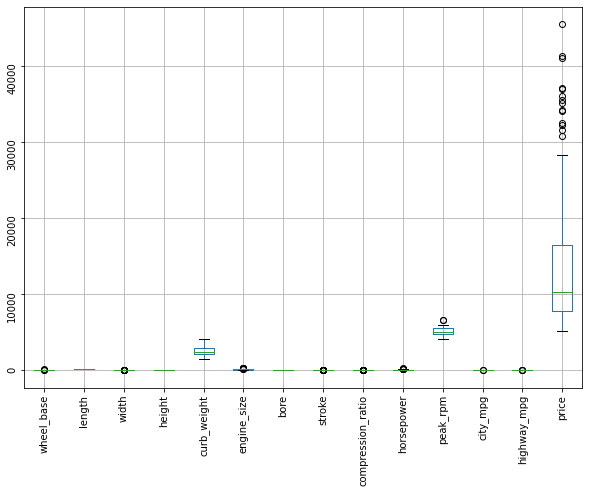

In [677]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
cars[num_cols].boxplot()
ax.tick_params(labelrotation=90)
plt.show()

In [678]:
cars["peak_rpm"].describe(percentiles=[.25,.50,.75,.90])

count     193.000000
mean     5099.740933
std       468.694369
min      4150.000000
25%      4800.000000
50%      5100.000000
75%      5500.000000
90%      5500.000000
max      6600.000000
Name: peak_rpm, dtype: float64

In [679]:
for each_col in ord_cols:
    print(cars_analysis[each_col].value_counts())
    print('\n')

 0    63
 1    51
 2    31
 3    23
-1    22
-2     3
Name: symboling, dtype: int64


toyota           32
nissan           18
mitsubishi       13
honda            13
volkswagen       12
mazda            12
subaru           12
peugot           11
volvo            11
dodge             8
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
mercury           1
Name: make, dtype: int64


gas       174
diesel     19
Name: fuel_type, dtype: int64


std      158
turbo     35
Name: aspiration, dtype: int64


four    112
two      81
Name: num_doors, dtype: int64


sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64


fwd    114
rwd     71
4wd      8
Name: drive_wheels, dtype: int64


front    190
rear       3
Name: engine_location, dtype: int64


ohc     141
ohcf     15
ohcv     13
d

In [680]:
#removes columns to prevent collinearity
#dummy_df.drop(columns=['engine_location_rear','num_doors_two','aspiration_std','fuel_type_diesel'],inplace=True)

In [681]:
correlations=cars.corr()
most_corr_features = correlations[(correlations['price'].between(-1,-0.5)) | (correlations['price'].between(0.5,1))]['price']
most_corr_features.index

Index(['wheel_base', 'length', 'width', 'curb_weight', 'engine_size', 'bore',
       'horsepower', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

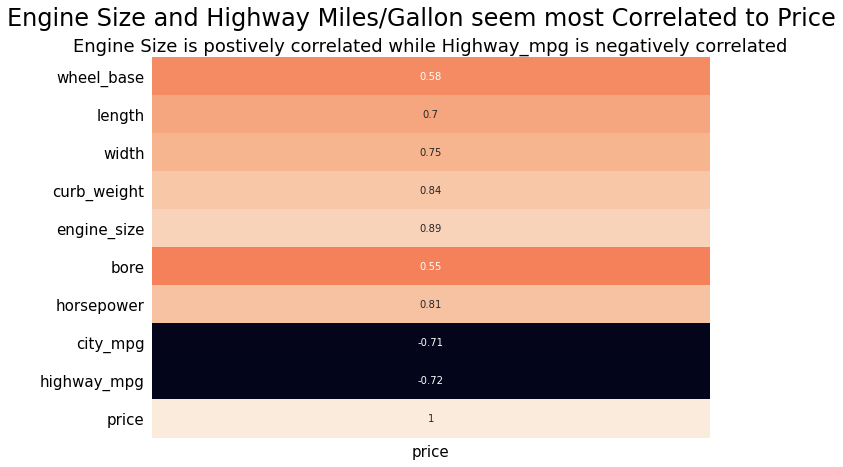

In [682]:
correlation = cars[most_corr_features.index].corr()
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
sns.heatmap(correlation.loc[:,"price":"price"],annot=True,cbar=False)
ax.tick_params(axis='y',left=False,rotation=0,labelsize=15)
ax.tick_params(axis='x',bottom=False,rotation=0,labelsize=15)
ax.set_title("Engine Size is postively correlated while Highway_mpg is negatively correlated",size=18)
plt.suptitle("Engine Size and Highway Miles/Gallon seem most Correlated to Price",size=24)
plt.show()

In [683]:
##Required DO NOT DELETE
not_price=[each_col for each_col in most_corr_features.index if each_col!='price']

In [684]:
not_price

['wheel_base',
 'length',
 'width',
 'curb_weight',
 'engine_size',
 'bore',
 'horsepower',
 'city_mpg',
 'highway_mpg']

In [685]:
num_cols

['wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price']

In [686]:
cars[not_price]=(cars[not_price]-cars[not_price].min())/(cars[not_price].max()-cars[not_price].min())
cars.drop(columns=ord_cols,inplace=True)
#cars=pd.concat([cars,dummy_df],axis=1)
cars

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.058309,0.413433,0.324786,48.8,0.411171,0.260377,0.664286,2.68,9.0,0.294393,5000.0,0.222222,0.289474,13495.0
1,0.058309,0.413433,0.324786,48.8,0.411171,0.260377,0.664286,2.68,9.0,0.294393,5000.0,0.222222,0.289474,16500.0
2,0.230321,0.449254,0.444444,52.4,0.517843,0.343396,0.100000,3.47,9.0,0.495327,5000.0,0.166667,0.263158,16500.0
3,0.384840,0.529851,0.504274,54.3,0.329325,0.181132,0.464286,3.40,10.0,0.252336,5500.0,0.305556,0.368421,13950.0
4,0.373178,0.529851,0.521368,54.3,0.518231,0.283019,0.464286,3.40,8.0,0.313084,5500.0,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.655977,0.711940,0.735043,55.5,0.567882,0.301887,0.885714,3.15,9.5,0.308411,5400.0,0.277778,0.315789,16845.0
201,0.655977,0.711940,0.726496,55.5,0.605508,0.301887,0.885714,3.15,8.7,0.523364,5300.0,0.166667,0.236842,19045.0
202,0.655977,0.711940,0.735043,55.5,0.591156,0.422642,0.742857,2.87,8.8,0.401869,5500.0,0.138889,0.184211,21485.0
203,0.655977,0.711940,0.735043,55.5,0.670675,0.316981,0.335714,3.40,23.0,0.271028,4800.0,0.361111,0.289474,22470.0


[Index](#Index)

# 4

## Title

In [687]:
cars.columns

Index(['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size',
       'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
       'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [688]:
#univariate
def knn_train_test(feature_col,target_col,data,n=10):
    shuffle_index = np.random.permutation(data.index)
    data = data.reindex(shuffle_index)
    train_data = data.iloc[:int(len(data)*.8)]
    test_data = data.iloc[int(len(data)*.8):]
    knn = skneighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(train_data[[feature_col]],train_data[target_col])
    predictions = knn.predict(test_data[[feature_col]])
    mse = skmetrics.mean_squared_error(test_data[target_col],predictions)
    rmse = mse**0.5
    return round(rmse,2)

In [689]:
parameter=[5,10,15,20]
univariate_param_result=pd.DataFrame(columns=["rmse"]+not_price)
for each_parameter in parameter:
    parameter_results=[]
    parameter_results.append(each_parameter)
    for each_col in not_price:
        rmse=knn_train_test(each_col,"price",cars,each_parameter)
        parameter_results.append(rmse)
    pos=len(univariate_param_result)
    univariate_param_result.loc[pos]=parameter_results
univariate_param_result

,rmse,wheel_base,length,width,curb_weight,engine_size,bore,horsepower,city_mpg,highway_mpg
0,5.0,6416.37,5945.43,3827.06,6266.55,3514.64,5634.89,2799.41,3489.15,4821.47
1,10.0,5458.33,8468.85,4011.09,3493.42,3412.22,5492.65,4079.49,4092.84,4276.17
2,15.0,5841.01,4188.28,4216.36,4051.45,3400.62,5898.98,5344.15,4551.85,3908.00
3,20.0,6503.58,5386.76,4763.69,3957.73,3939.49,4182.48,5008.12,4625.15,3507.97


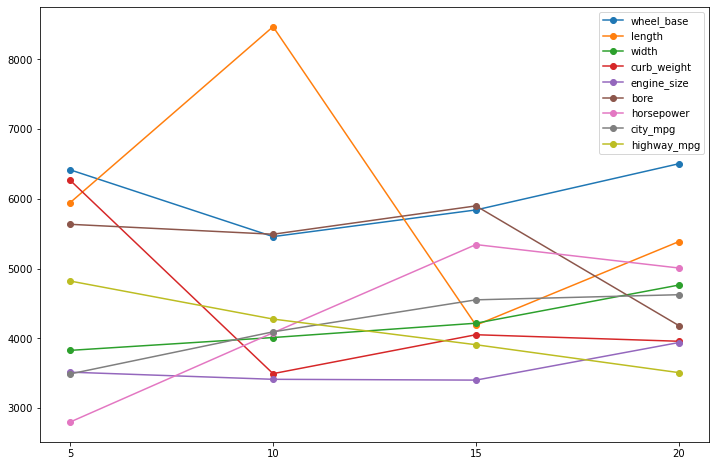

In [698]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
#univariate_param_result["rmse"]
ax.plot(list(range(5,25,5)),univariate_param_result[not_price],marker='o')
ax.set_xticks([5,10,15,20])
ax.legend(not_price)
plt.show()

In [652]:
parameter=[5,10,15,20]
univariate_param_result=pd.DataFrame(columns=["col_name",'rmse_5','rmse_10','rmse_15','rmse_20'])
for each_col in most_corr_features.index:
    col_results=[]
    if each_col!="price":
        col_results.append(each_col)
        for each_parameter in parameter:
            rmse=knn_train_test(each_col,"price",cars,each_parameter)
            col_results.append(rmse)
        #print(col_results)
        pos=len(univariate_param_result)
        univariate_param_result.loc[pos]=col_results
univariate_param_result.T

,0,1,2,3,4,5,6,7,8
col_name,wheel_base,length,width,curb_weight,engine_size,bore,horsepower,city_mpg,highway_mpg
rmse_5,6485.98,5112.96,4968.73,4143.26,3593.58,6047.73,4607.55,4349.27,5189.36
rmse_10,4331.61,6909.98,7181.48,4562.24,3685.52,4981.58,4825.31,4461.38,5430.0
rmse_15,4198.51,4445.46,7235.35,4900.18,5266.33,5824.23,4723.8,4588.86,4156.67
rmse_20,7058.86,5040.38,5494.36,5813.58,5872.04,6372.1,5365.31,3089.17,5121.9


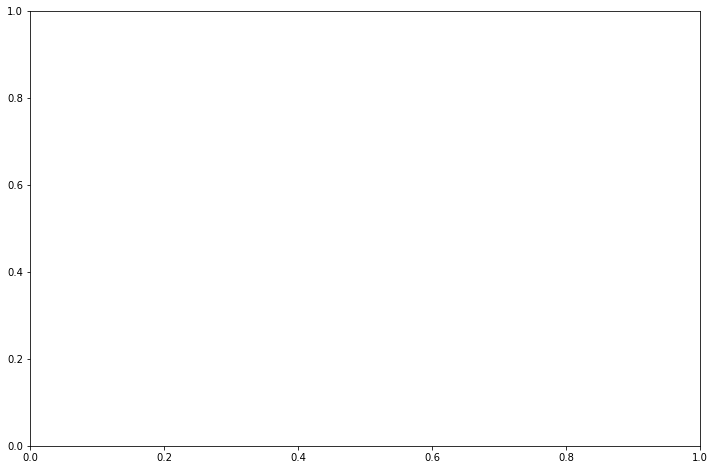

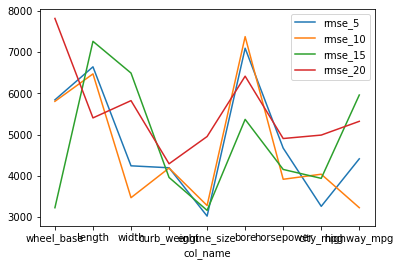

In [651]:
fig=plt.figure(figsize=(12,8))
#ax=fig.add_subplot(111)
univariate_param_result.set_index("col_name").plot()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (4,) and (9,)

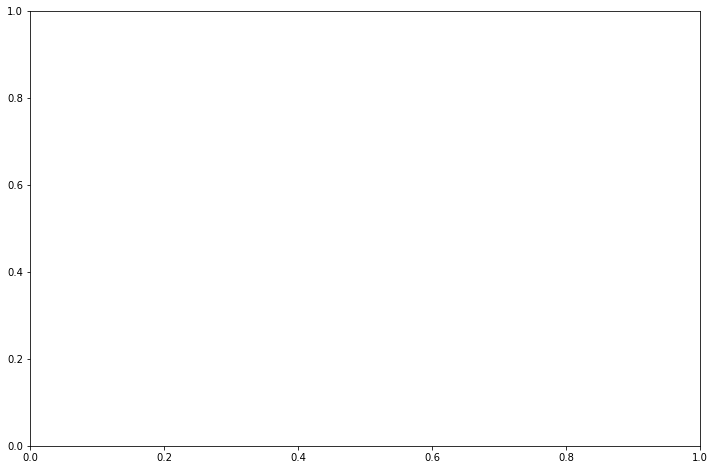

In [650]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
#ax.hlines(y=sorted_rmse["col_name"],xmin=1000,xmax=sorted_rmse["rmse"])
for each_col in univariate_param_result.columns[1:]:
    ax.plot(list(range(5,25,5)),univariate_param_result[each_col])
plt.show()

In [ ]:
parameter=[5,10,15,20]
univariate_param_result=pd.DataFrame(columns=["col_name",'rmse_5','rmse_10','rmse_15','rmse_20'])
for each_parameter in parameter:
    for each_col in most_corr_features.index:
        if each_col!="price":
    

In [319]:
knn_train_test("wheel_base","price",cars)

(36405738.09, 6033.72)

In [320]:
knn_train_test("length","price",cars)

(18016237.38, 4244.55)

In [321]:
type(most_corr_features.index)

pandas.core.indexes.base.Index

In [322]:
col_name=pd.Series(most_corr_features.index)

In [323]:
t=PrettyTable(["Column Name","MSE","RMSE"])
rmses=[]
col_name=[]
for each_col in most_corr_features.index:
    if each_col!="price":
        mse,rmse=knn_train_test(each_col,"price",cars)
        col_name.append(each_col)
        rmses.append(rmse)
        t.add_row([each_col,mse,rmse])

mse_values=pd.DataFrame(pd.Series(col_name),columns=['col_name'])
mse_values["rmse"] = pd.Series(rmses)
print(t)

+--------------------+--------------+----------+
|    Column Name     |     MSE      |   RMSE   |
+--------------------+--------------+----------+
|     wheel_base     | 42478079.68  | 6517.52  |
|       length       | 24396169.96  | 4939.25  |
|       width        | 20124350.67  | 4486.02  |
|    curb_weight     | 25029899.38  | 5002.99  |
|    engine_size     | 15473396.44  | 3933.62  |
|        bore        | 42351084.33  | 6507.77  |
|     horsepower     | 24810867.44  | 4981.05  |
|      city_mpg      | 27172594.41  | 5212.73  |
|    highway_mpg     | 36669102.87  |  6055.5  |
| make_mercedes-benz | 113291002.74 | 10643.82 |
|  drive_wheels_fwd  | 34196020.72  | 5847.74  |
|  drive_wheels_rwd  | 24451110.88  | 4944.81  |
| num_cylinders_four |  30569137.4  | 5528.94  |
|  fuel_system_2bbl  | 53723010.61  |  7329.6  |
|  fuel_system_mpfi  | 55702990.42  | 7463.44  |
+--------------------+--------------+----------+


In [324]:
sorted_rmse=mse_values.sort_values("rmse",ascending=False)

In [325]:
sorted_rmse.reset_index(drop=True,inplace=True)

In [326]:
sorted_rmse

,col_name,rmse
0,make_mercedes-benz,10643.82
1,fuel_system_mpfi,7463.44
2,fuel_system_2bbl,7329.60
3,wheel_base,6517.52
4,bore,6507.77
5,highway_mpg,6055.50
6,drive_wheels_fwd,5847.74
7,num_cylinders_four,5528.94
8,city_mpg,5212.73
9,curb_weight,5002.99


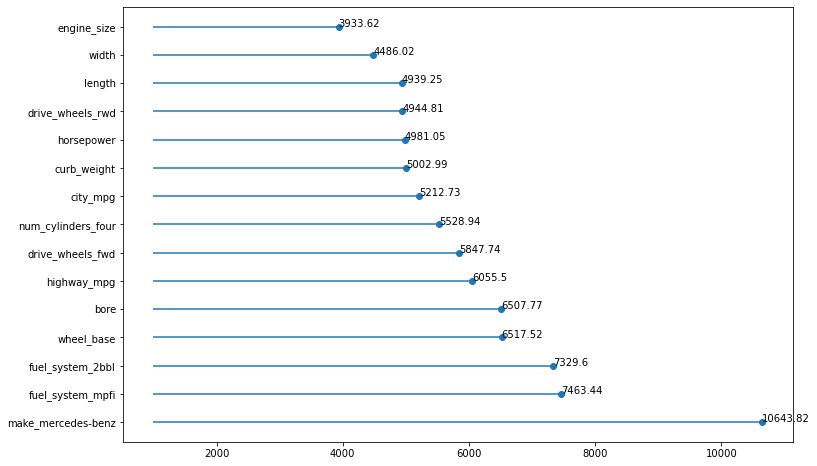

In [327]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
ax.hlines(y=sorted_rmse["col_name"],xmin=1000,xmax=sorted_rmse["rmse"])
ax.scatter(y=sorted_rmse["col_name"],x=sorted_rmse["rmse"])

for i in range(len(sorted_rmse)):
    ax.text(s=sorted_rmse.iloc[i,1],x=sorted_rmse.iloc[i,1],y=sorted_rmse.iloc[i,0])
plt.show()

[Index](#Index)

# 5

## Title

instructions


In [328]:
#multivariate
def knn_train_test(feature_cols,target_col,data):
    shuffle_index = np.random.permutation(data.index)
    data = data.reindex(shuffle_index)
    train_data = data.iloc[:int(len(data)*.8)]
    test_data = data.iloc[int(len(data)*.8):]
    knn = skneighbors.KNeighborsRegressor(n_neighbors=10)
    knn.fit(train_data[feature_cols],train_data[target_col])
    predictions = knn.predict(test_data[feature_cols])
    mse = skmetrics.mean_squared_error(test_data[target_col],predictions)
    rmse = mse**0.5
    return round(mse,2),round(rmse,2)

In [329]:
cars.columns[2:]

Index(['width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price', 'symboling_-1', 'symboling_-2', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'make_alfa-romero',
       'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda',
       'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel_type_gas',
       'aspiration_turbo', 'num_doors_four', 'body_style_convertible',
       'body_style_hardtop', 'body_style_hatchback', 'body_style_sedan',
       'body_style_wagon', 'drive_wheels_4wd', 'drive_wheels_fwd',
       'drive_wheels_rwd', 'engine_location_front', 'engine_type_dohc',
       'engine_type_l', 'engine_type_ohc', 'engine_type_ohcf',
  

In [330]:
continuous_data=cars.columns[0:13]
categorical_data=cars.columns[14:]
feature_set_rmse=pd.DataFrame(columns=['feature_set','rmse'])

continuous_data_mse,continuous_data_rmse=knn_train_test(continuous_data,"price",cars)

df_length=len(feature_set_rmse)
feature_set_rmse.loc[df_length]=["continuous_features",continuous_data_rmse]

df_length=len(feature_set_rmse)
feature_set_rmse.loc[df_length]=["categorical_features",categorical_data_rmse]

feature_set_rmse

,feature_set,rmse
0,continuous_features,3973.00
1,categorical_features,833.59


In [331]:
best_positive_corr_features=most_corr_features[most_corr_features.between(0,.999,inclusive='neither')].index
best_negative_corr_features=most_corr_features[most_corr_features.between(-1,0,inclusive='neither')].index

best_positive_corr_features_mse,best_positive_corr_features_rmse=knn_train_test(best_positive_corr_features,"price",cars)
df_length=len(feature_set_rmse)
feature_set_rmse.loc[df_length]=["best_positive_corr_features",best_positive_corr_features_rmse]

feature_set_rmse
# df_length=len(feature_set_rmse)
# feature_set_rmse.loc[df_length]=["continuous_features",continuous_data_rmse]

,feature_set,rmse
0,continuous_features,3973.00
1,categorical_features,833.59
2,best_positive_corr_features,4243.14


In [332]:
best_negative_corr_features_mse,best_negative_corr_features_rmse=knn_train_test(best_negative_corr_features,"price",cars)
df_length=len(feature_set_rmse)
feature_set_rmse.loc[df_length]=["best_negative_corr_features",best_negative_corr_features_rmse]

In [333]:
feature_set_rmse

,feature_set,rmse
0,continuous_features,3973.00
1,categorical_features,833.59
2,best_positive_corr_features,4243.14
3,best_negative_corr_features,3343.80


In [334]:
for i in range(1,len(mse_values)):
    num_features=i+1
    features=mse_values.sort_values("rmse")["col_name"][:num_features]
    
    features_mse,features_rmse=knn_train_test(features,"price",cars)
    df_length=len(feature_set_rmse)
    feature_set_rmse.loc[df_length]=["{}_best_features".format(num_features),features_rmse]
feature_set_rmse

,feature_set,rmse
0,continuous_features,3973.00
1,categorical_features,833.59
2,best_positive_corr_features,4243.14
3,best_negative_corr_features,3343.80
4,2_best_features,3538.67
5,3_best_features,3168.47
6,4_best_features,2883.65
7,5_best_features,3431.97
8,6_best_features,2894.74
9,7_best_features,3603.28


In [284]:
cars.columns

Index(['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size',
       'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
       'city_mpg', 'highway_mpg', 'price', 'symboling_-1', 'symboling_-2',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_saab',
       'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo',
       'fuel_type_gas', 'aspiration_turbo', 'num_doors_four',
       'body_style_convertible', 'body_style_hardtop', 'body_style_hatchback',
       'body_style_sedan', 'body_style_wagon', 'drive_wheels_4wd',
       'drive_wheels_fwd', 'drive_wheels_rwd', 'engine_location_front',
       'engine_type_dohc', 'engine_type_l', 'engine_type_ohc'

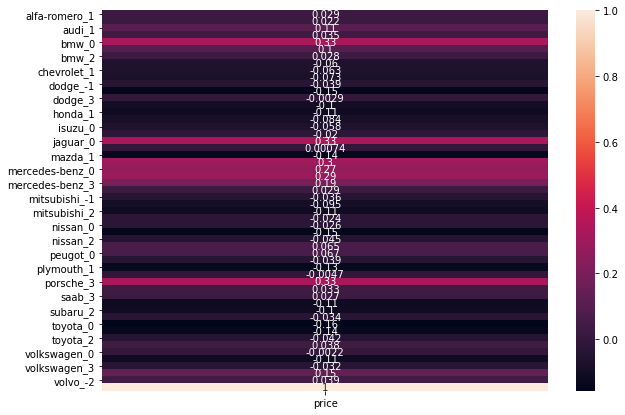

In [359]:
make_symboling=pd.get_dummies(cars_analysis["make"]+'_'+cars_analysis["symboling"].astype("str"))
make_symboling['price']=cars["price"]
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
sns.heatmap(make_symboling.corr().loc[:,"price":"price"],annot=True)
plt.show()

In [335]:
cars.columns[:13]

Index(['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size',
       'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
       'city_mpg', 'highway_mpg'],
      dtype='object')

In [346]:
price_categorisation=cars[cars.columns[13:]].corr()["price"]
price_categorisation[price_categorisation.between(-0.99,-0.5,inclusive="both") | price_categorisation.between(0.5,0.99,inclusive="both")]

make_mercedes-benz    0.524817
drive_wheels_fwd     -0.603598
drive_wheels_rwd      0.647897
num_cylinders_four   -0.718585
fuel_system_2bbl     -0.510875
fuel_system_mpfi      0.525047
Name: price, dtype: float64

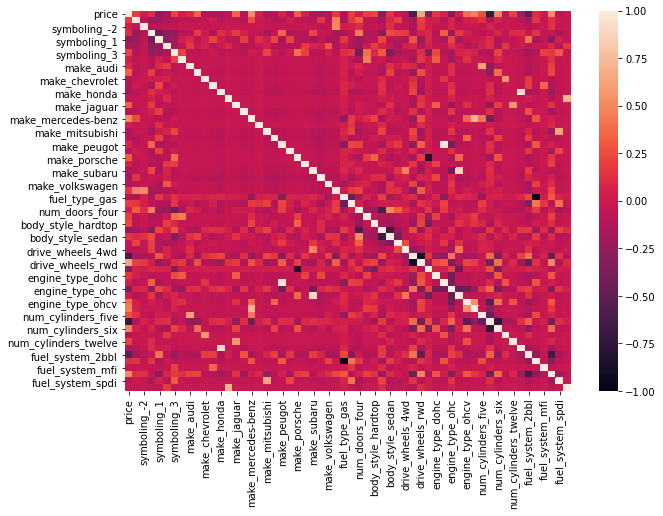

In [344]:
#cars[cars.columns[13:]].corr()
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
sns.heatmap(cars[cars.columns[13:]].corr())
plt.show()

In [285]:
cars[continuous_data].columns

Index(['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size',
       'bore', 'stroke', 'compression_ratio', 'horsepower'],
      dtype='object')

In [286]:
cars[categorical_data].columns

Index(['highway_mpg', 'price', 'symboling_-1', 'symboling_-2', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'make_alfa-romero',
       'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda',
       'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel_type_gas',
       'aspiration_turbo', 'num_doors_four', 'body_style_convertible',
       'body_style_hardtop', 'body_style_hatchback', 'body_style_sedan',
       'body_style_wagon', 'drive_wheels_4wd', 'drive_wheels_fwd',
       'drive_wheels_rwd', 'engine_location_front', 'engine_type_dohc',
       'engine_type_l', 'engine_type_ohc', 'engine_type_ohcf',
       'engine_type_ohcv', 'num_cylinders_eight', 'num_cylinders_five',
       'num_cylinders_four', 'num_cylinders_six', 'num_cylinders_three

In [279]:
mse_values.sort_values("rmse")["col_name"][:4]

3    curb_weight
4    engine_size
8    highway_mpg
6     horsepower
Name: col_name, dtype: object

[Index](#Index)

# 6

## Title

instructions


[Index](#Index)

# 7

## Title

instructions


[Index](#Index)

# 8

## Title

instructions


[Index](#Index)

# 9

## Title

instructions


[Index](#Index)

# 10

## Title

instructions


[Index](#Index)

# 11

## Title

instructions


[Index](#Index)

# 12

## Title

instructions


[Index](#Index)

# 13

## Learning

- [Normalization or Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)
- [Difference between OnehotEncoder and get_dummies()](https://stackoverflow.com/questions/36631163/what-are-the-pros-and-cons-between-get-dummies-pandas-and-onehotencoder-sciki)
- [Appending a list or series to a newly created dataframe on the go](https://www.kite.com/python/answers/how-to-append-a-list-as-a-row-to-a-pandas-dataframe-in-python)

instructions


[Index](#Index)